# Home credit default risk-Kaggle Challenge

## Importing key libraries

In [1]:
# For warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#For processing data 
import pandas as pd
import numpy as np
import sklearn
# File system manangement
import os
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
#For visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1-Getting to know data

In [3]:
# Loading data
app_train = pd.read_csv('application_train.csv')
app_train.shape

(307511, 122)

In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Testing data features
app_test = pd.read_csv('application_test.csv')

In [6]:
app_test.shape

(48744, 121)

In [7]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## a) Dependent  Variable

The TARGET variable of the test set was hidden to evaluate the model built from train practice. The number of observations of train is about 6 times larger than that of train.

In [8]:
app_train['TARGET'][0:5]

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [9]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

**0 (will repay loan on time), 1 (will have difficulty repaying loan). In other words, 0 shows "Rapid" and 1 shows "Not Rapid" classes. These are samples with imbalance which might create biaseness in results. We need to meet this challenge.<br> when we get into problems with inbalanced classes , accuracy is not the best metric. We will come to that later**

0    282686
1     24825
Name: TARGET, dtype: int64


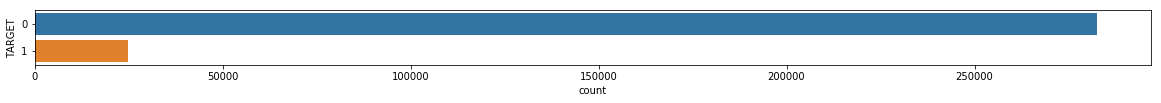

In [10]:
# How many people have difficulty in repaying
fig = plt.figure(figsize=(20,1))
sns.countplot(y='TARGET', data=app_train);
print(app_train.TARGET.value_counts())

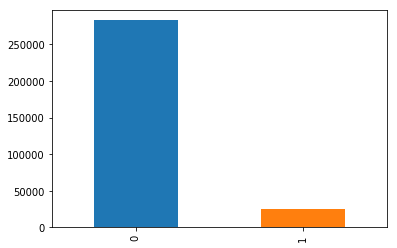

In [11]:
app_train['TARGET'].value_counts().plot.bar()

In [12]:
n_group = app_train['TARGET'].value_counts()
n_group_sum = n_group.sum()

print('will repay loan on time(Rapid): {}'.format(n_group[0]))
print('will have difficulty repaying(Not Rapid): {}'.format(n_group[1]))

print('will repay loan on time(Rapid): {:.2f} {}'.format(n_group[0]/n_group_sum*100, '%'))
print('will have difficulty repaying(Not Rapid): {:.2f} {}'.format(n_group[1]/n_group_sum*100, '%'))

will repay loan on time(Rapid): 282686
will have difficulty repaying(Not Rapid): 24825
will repay loan on time(Rapid): 91.93 %
will have difficulty repaying(Not Rapid): 8.07 %


## b) Other features in data
Start with data type

In [13]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [14]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(app_train)
table_dtype

,Data Type
SK_ID_CURR,int64
FLAG_CONT_MOBILE,int64
FLAG_PHONE,int64
FLAG_EMAIL,int64
FLAG_DOCUMENT_9,int64
FLAG_DOCUMENT_8,int64
REGION_RATING_CLIENT,int64
REGION_RATING_CLIENT_W_CITY,int64
FLAG_DOCUMENT_7,int64
REG_REGION_NOT_LIVE_REGION,int64


int64 and float64 are numeric variables (which can be either discrete or continuous).<br> object columns contain strings and are categorical features.

## C) Checking categorical variables

In [15]:
# Checking unique categorical variables
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

**ORGANIZATION_TYPE got 58 sub-categories and OCCUPATION_TYPE got 18. So, we shall treat them separately<br>**

Let's work on other features

In [16]:
app_train['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

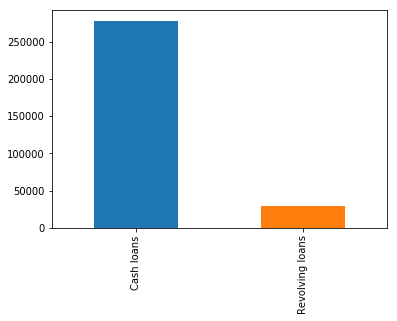

In [17]:
app_train['NAME_CONTRACT_TYPE'].value_counts().plot.bar()

In [18]:
app_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

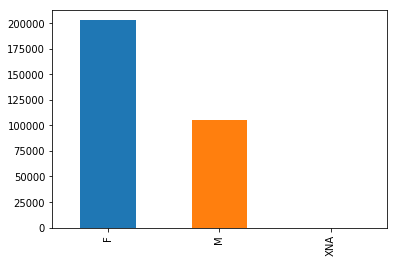

In [19]:
app_train['CODE_GENDER'].value_counts().plot.bar()

In [20]:
app_train['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

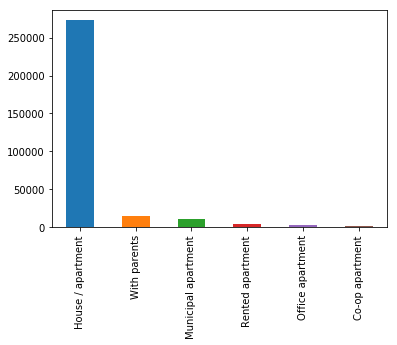

In [21]:
app_train['NAME_HOUSING_TYPE'].value_counts().plot.bar()

**It's fun and we can all day. But, we better use intelligent programming and check these features all in one**

In [22]:
# Exclude ORGANIZATION_TYPE and OCCUPATION_TYPE 

dtypes_object = table_dtype[table_dtype['Data Type'] == 'object'].index.tolist()
dtypes_object = [col for col in dtypes_object if col not in ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']]

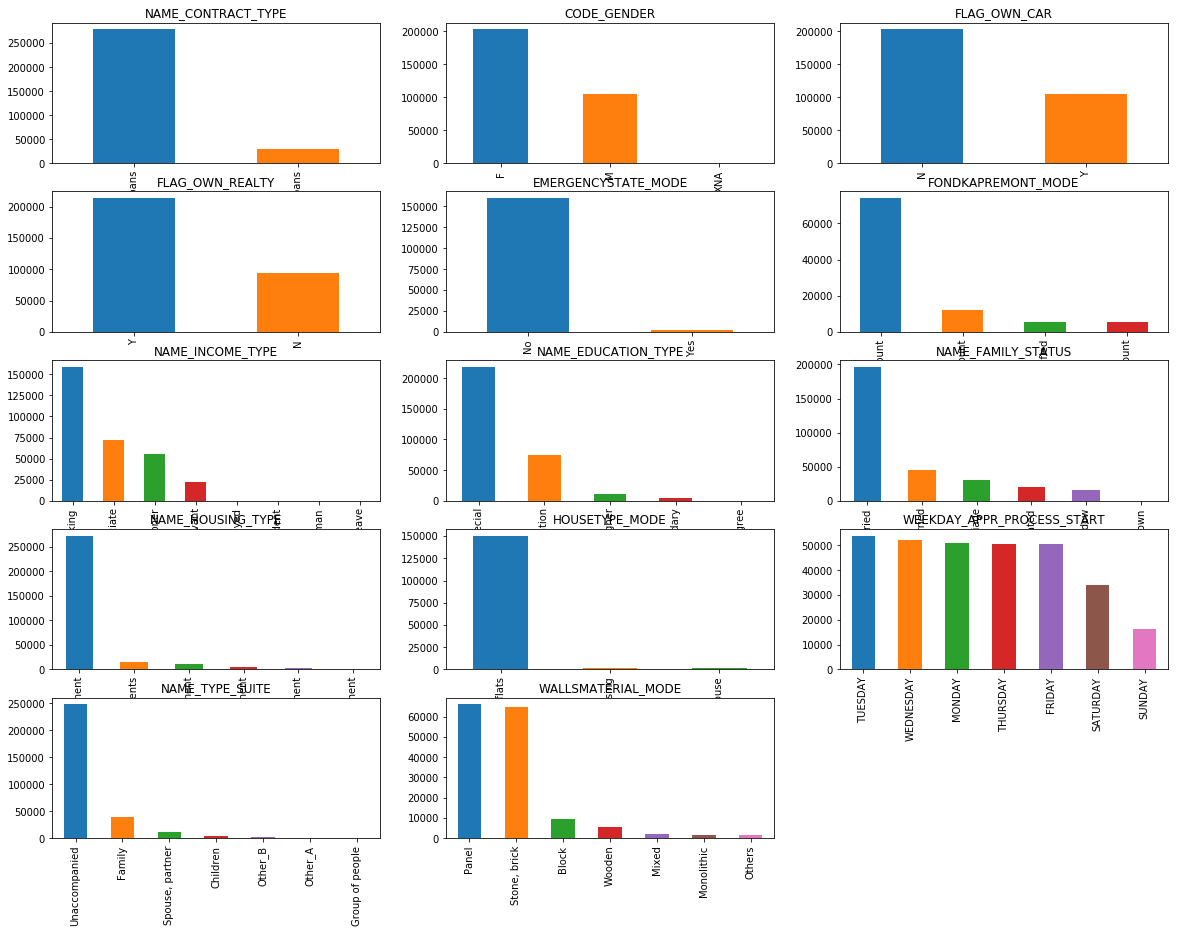

In [23]:
# Check relation of all remaining features. Only bar-plots
def _plot_bar_classes(cols):
    app_train[cols].value_counts().plot.bar()

plt.figure(figsize = (20, 15))    
for i in range(1, 15, 1):
    plt.subplot(5, 3, i)
    _plot_bar_classes(dtypes_object[i-1])
    plt.title(dtypes_object[i-1])

### ii Checking 'TARGET' response to all categorical features

In [24]:
#Repaid / Not Repaid rate statistics follow object type forecast variables
def _per_categorical(col):
    tbl_per = pd.pivot_table(app_train[['TARGET', col]], index = ['TARGET'], columns = [col], aggfunc = len)
    per_categorical = (tbl_per.iloc[0, :]/tbl_per.iloc[1, :]).sort_values(ascending = True)
    print(per_categorical)
    print('-------------------------------------\n')
    return per_categorical

for col in dtypes_object:
    _per_categorical(col)

NAME_CONTRACT_TYPE
Cash loans         10.981913
Revolving loans    17.253741
dtype: float64
-------------------------------------

CODE_GENDER
M       8.860066
F      13.287085
XNA          NaN
dtype: float64
-------------------------------------

FLAG_OWN_CAR
N    10.764392
Y    12.805042
dtype: float64
-------------------------------------

FLAG_OWN_REALTY
N    11.012114
Y    11.560325
dtype: float64
-------------------------------------

EMERGENCYSTATE_MODE
Yes     9.439462
No     13.357709
dtype: float64
-------------------------------------

FONDKAPREMONT_MODE
not specified            12.256410
reg oper account         13.330357
reg oper spec account    14.252525
org spec account         16.183486
dtype: float64
-------------------------------------

NAME_INCOME_TYPE
Maternity leave          1.500000
Unemployed               1.750000
Working                  9.429191
Commercial associate    12.361381
State servant           16.376301
Pensioner               17.565392
Businessman  

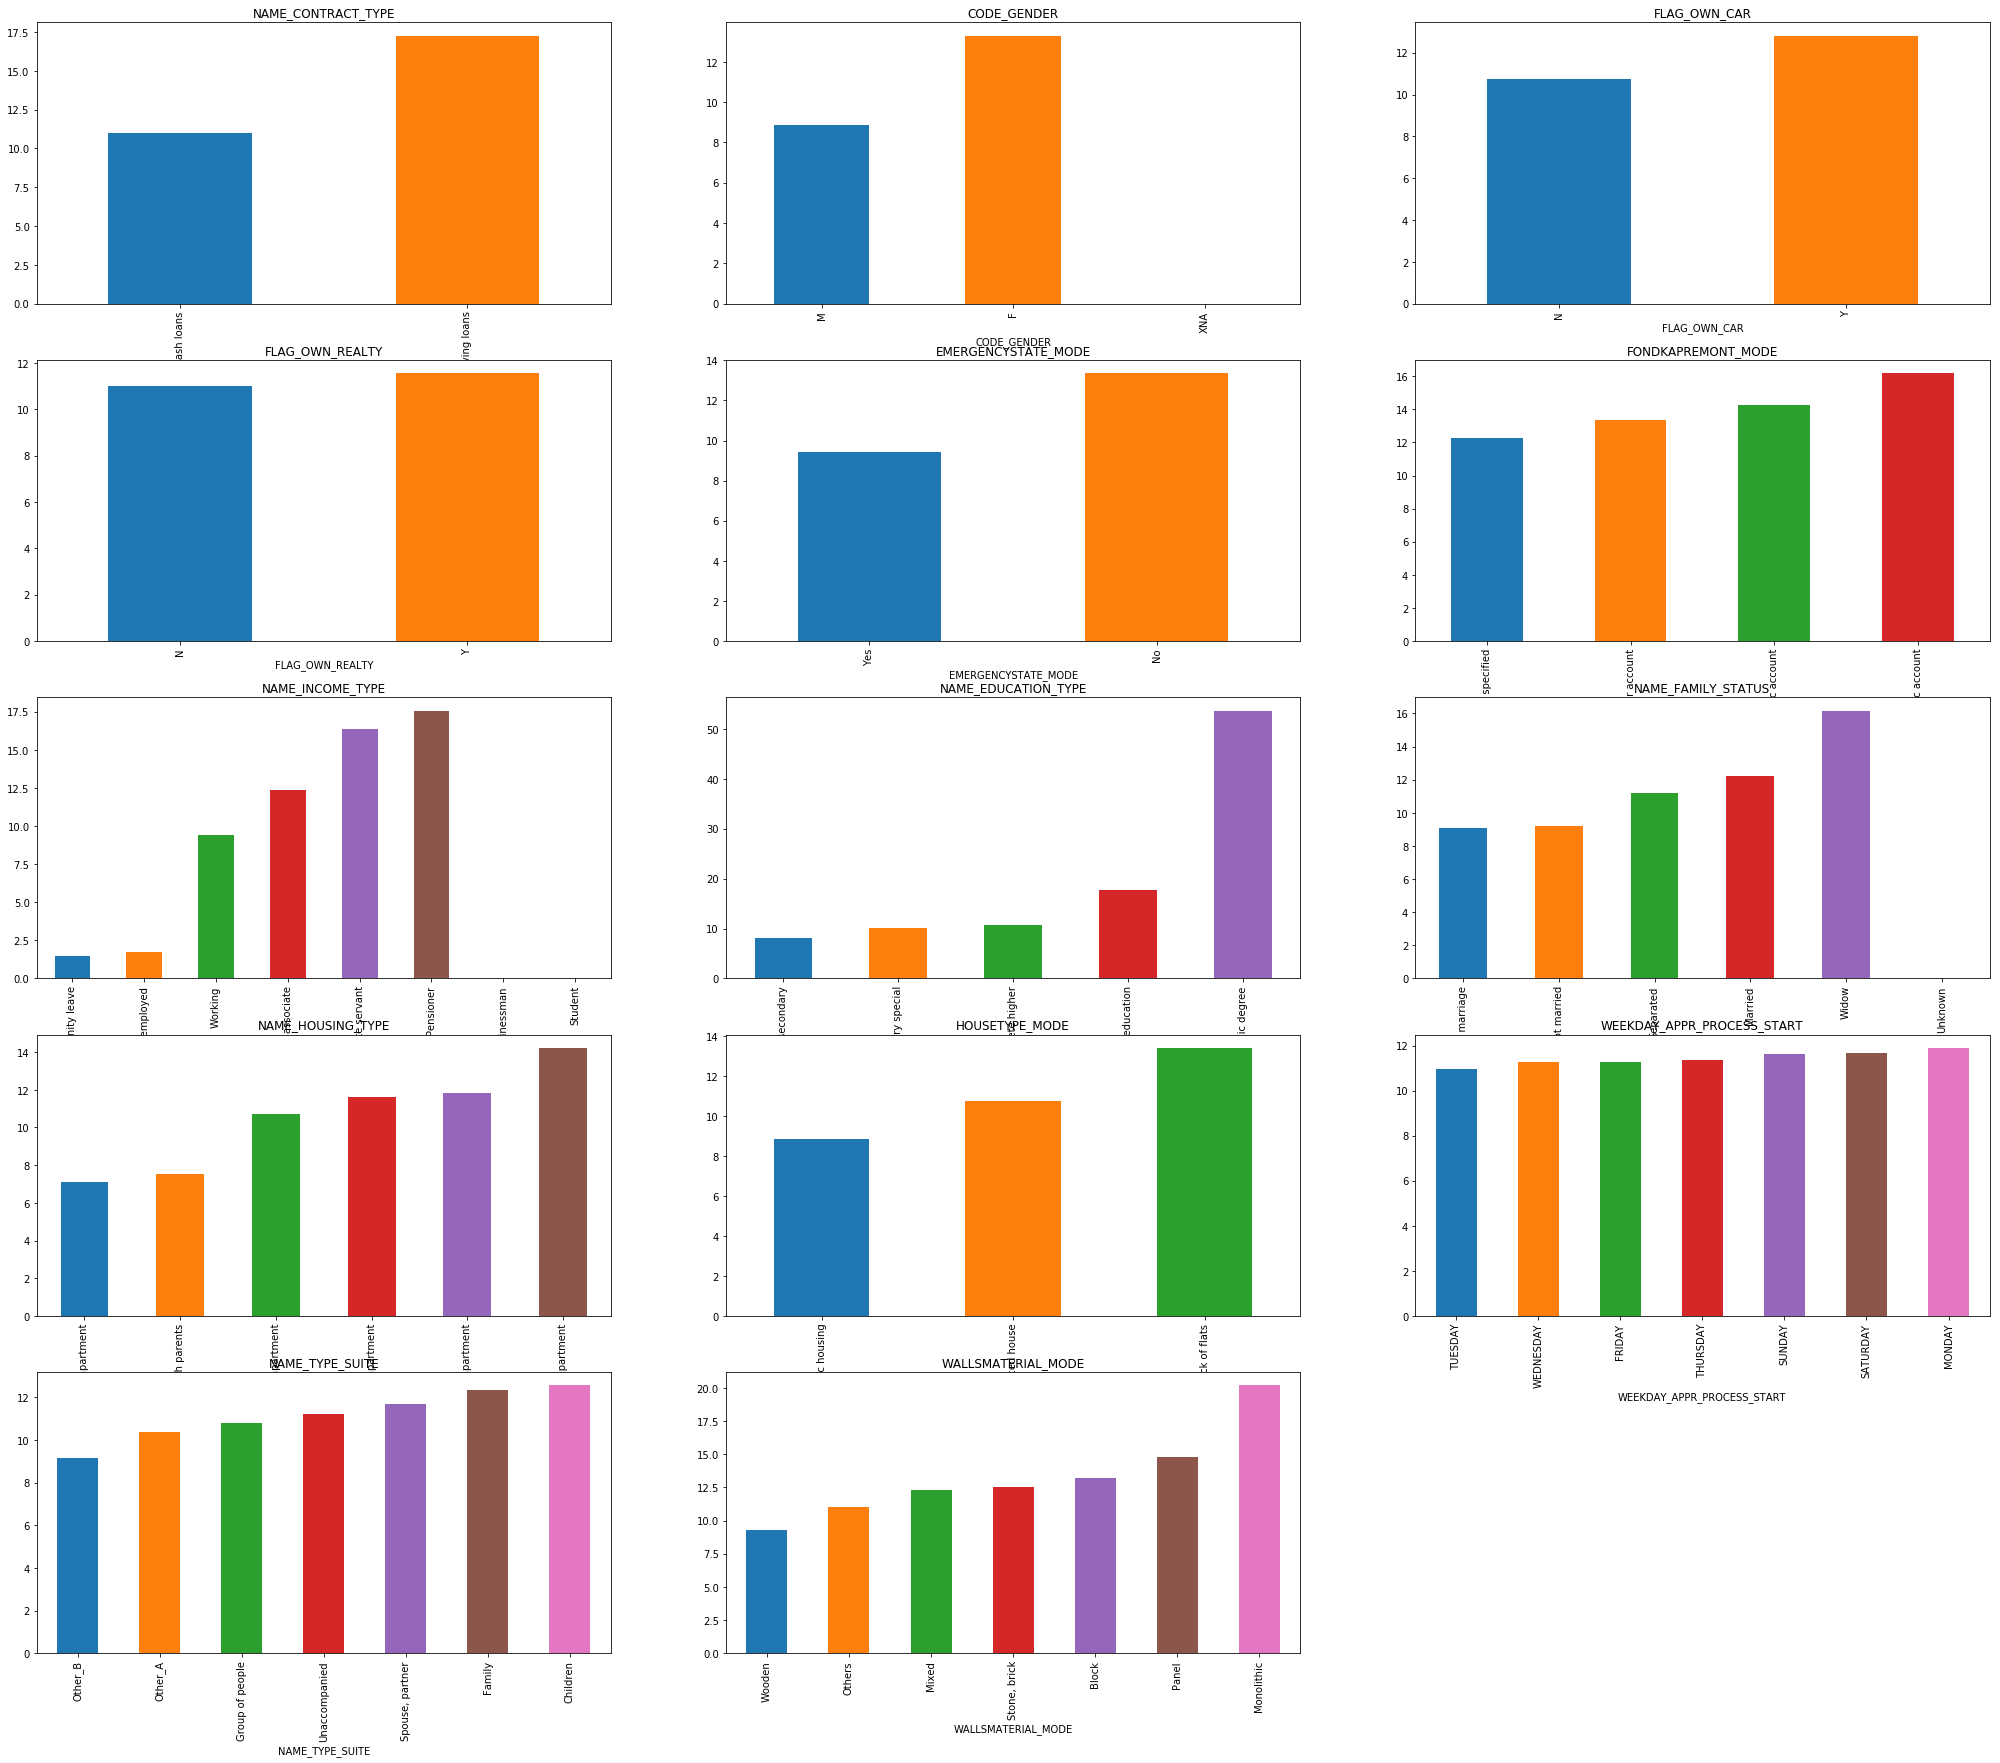

In [25]:
#Drawing the Repaid / Not Repaid scale chart according to the object type forecast variables.
def _plot_per_categorical(col):
    tbl_per = pd.pivot_table(app_train[['TARGET', col]], index = ['TARGET'], columns = [col], aggfunc = len)
    per_categorical = (tbl_per.iloc[0, :]/tbl_per.iloc[1, :]).sort_values(ascending = True)
    per_categorical.plot.bar()
    plt.title(col)
    return per_categorical

plt.figure(figsize = (35, 30))
i = 0
for col in dtypes_object:
    i += 1
    plt.subplot(5, 3, i)
    _plot_per_categorical(col)

### iii Checking separately for 2 variables ORGANIZATION_TYPE, OCCUPATION_TYPE

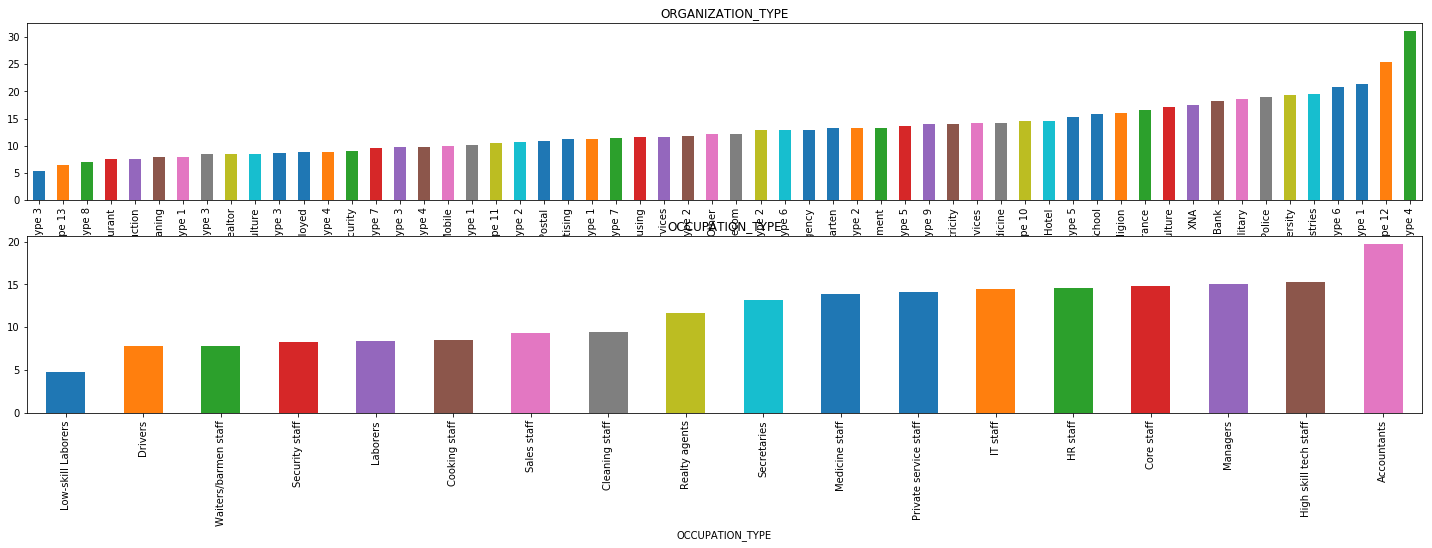

In [26]:
plt.figure(figsize = (25, 15))
i = 0
for col in ['ORGANIZATION_TYPE', 'OCCUPATION_TYPE']:
    i += 1
    plt.subplot(4, 1, i)
    _plot_per_categorical(col)

To minimize the number of features, we can group the variables with Repaid / Not Repaid ratios nearly equal to a group because these groups have similar characteristics in contract classification.

In [27]:
for col in ['ORGANIZATION_TYPE', 'OCCUPATION_TYPE']:
    _per_categorical(col)

ORGANIZATION_TYPE
Transport: type 3          5.347594
Industry: type 13          6.444444
Industry: type 8           7.000000
Restaurant                 7.542453
Construction               7.561783
Cleaning                   7.965517
Industry: type 1           8.034783
Industry: type 3           8.419540
Realtor                    8.428571
Agriculture                8.548638
Trade: type 3              8.673130
Self-employed              8.829069
Industry: type 4           8.853933
Security                   9.021605
Trade: type 7              9.582432
Business Entity Type 3     9.753124
Transport: type 4          9.774451
Mobile                     9.931034
Trade: type 1             10.225806
Industry: type 11         10.555556
Business Entity Type 2    10.725556
Postal                    10.851648
Advertising               11.257143
Business Entity Type 1    11.287474
Industry: type 7          11.447619
Housing                   11.587234
Legal Services            11.708333
Transport:

In [28]:
# Group equal value rates into 1 group by schedule_div.
def _devide_group(col, schedule_div = None, n_groups = 3, *kwargs):
    cols = []
    tbl_per_cat = _per_categorical(col)
    
    if schedule_div is None:
        n_cats = len(tbl_per_cat)
        n_val_incat = int(n_cats/n_groups)
        n_odd = n_cats - n_groups*n_val_incat

        for i in range(n_groups):
            if i == n_groups - 1:
                el = tbl_per_cat[(n_val_incat*i):(n_val_incat*(i+1)+n_odd)].index.tolist()
            else:
                el = tbl_per_cat[(n_val_incat*i):n_val_incat*(i+1)].index.tolist()    
            cols.append(el)
    else:
        idx = 0
        for n_cols in schedule_div:
            el_cols = tbl_per_cat[idx:(idx+n_cols)].index.tolist()
            cols.append(el_cols)
            idx += n_cols
                
    return cols

In [29]:
# Ratios of Rapid/Not Rapid with occupation type
cols_OCCUPATION_TYPE = _devide_group(col = 'OCCUPATION_TYPE', schedule_div = [1, 7, 9, 1])
cols_OCCUPATION_TYPE

OCCUPATION_TYPE
Low-skill Laborers        4.830084
Drivers                   7.829141
Waiters/barmen staff      7.868421
Security staff            8.308864
Laborers                  8.452895
Cooking staff             8.574879
Sales staff               9.382277
Cleaning staff            9.409396
Realty agents            11.728814
Secretaries              13.184783
Medicine staff           13.924825
Private service staff    14.154286
IT staff                 14.470588
HR staff                 14.638889
Core staff               14.863061
Managers                 15.092620
High skill tech staff    15.233951
Accountants              19.702532
dtype: float64
-------------------------------------



[['Low-skill Laborers'],
 ['Drivers',
  'Waiters/barmen staff',
  'Security staff',
  'Laborers',
  'Cooking staff',
  'Sales staff',
  'Cleaning staff'],
 ['Realty agents',
  'Secretaries',
  'Medicine staff',
  'Private service staff',
  'IT staff',
  'HR staff',
  'Core staff',
  'Managers',
  'High skill tech staff'],
 ['Accountants']]

In [30]:
# Ratios of Rapid/Not Rapid with organization type
cols_ORGANIZATION_TYPE = _devide_group(col = 'ORGANIZATION_TYPE')
cols_ORGANIZATION_TYPE

ORGANIZATION_TYPE
Transport: type 3          5.347594
Industry: type 13          6.444444
Industry: type 8           7.000000
Restaurant                 7.542453
Construction               7.561783
Cleaning                   7.965517
Industry: type 1           8.034783
Industry: type 3           8.419540
Realtor                    8.428571
Agriculture                8.548638
Trade: type 3              8.673130
Self-employed              8.829069
Industry: type 4           8.853933
Security                   9.021605
Trade: type 7              9.582432
Business Entity Type 3     9.753124
Transport: type 4          9.774451
Mobile                     9.931034
Trade: type 1             10.225806
Industry: type 11         10.555556
Business Entity Type 2    10.725556
Postal                    10.851648
Advertising               11.257143
Business Entity Type 1    11.287474
Industry: type 7          11.447619
Housing                   11.587234
Legal Services            11.708333
Transport:

[['Transport: type 3',
  'Industry: type 13',
  'Industry: type 8',
  'Restaurant',
  'Construction',
  'Cleaning',
  'Industry: type 1',
  'Industry: type 3',
  'Realtor',
  'Agriculture',
  'Trade: type 3',
  'Self-employed',
  'Industry: type 4',
  'Security',
  'Trade: type 7',
  'Business Entity Type 3',
  'Transport: type 4',
  'Mobile',
  'Trade: type 1'],
 ['Industry: type 11',
  'Business Entity Type 2',
  'Postal',
  'Advertising',
  'Business Entity Type 1',
  'Industry: type 7',
  'Housing',
  'Legal Services',
  'Transport: type 2',
  'Other',
  'Telecom',
  'Industry: type 2',
  'Industry: type 6',
  'Emergency',
  'Kindergarten',
  'Trade: type 2',
  'Government',
  'Industry: type 5',
  'Industry: type 9'],
 ['Electricity',
  'Services',
  'Medicine',
  'Industry: type 10',
  'Hotel',
  'Trade: type 5',
  'School',
  'Religion',
  'Insurance',
  'Culture',
  'XNA',
  'Bank',
  'Military',
  'Police',
  'University',
  'Security Ministries',
  'Trade: type 6',
  'Transpo

After grouping the features in a categorical variable into aggregate features, we need to update the data table fields according to the new features.

### iv Updating original dataset

In [31]:
def _map_lambda_cats(cols_list, colname, x): 
    cats = list(map(lambda x:colname + '_' + str(x), np.arange(len(cols_list)).tolist()))
    for i in range(len(cols_ORGANIZATION_TYPE)):
        if x in cols_list[i]:
            return cats[i]

In [32]:
def _map_cats(cols_list, colname, dataset):                    
    return list(map(lambda x: _map_lambda_cats(cols_list, colname, x), 
                    dataset[colname]))

In [33]:
#Updating original datset with ORGANIZATION_TYPE
app_train['ORGANIZATION_TYPE'] = _map_cats(cols_ORGANIZATION_TYPE, 'ORGANIZATION_TYPE', app_train)

In [34]:
pd.Series.unique(app_train['ORGANIZATION_TYPE'])

array(['ORGANIZATION_TYPE_0', 'ORGANIZATION_TYPE_2',
       'ORGANIZATION_TYPE_1'], dtype=object)

In [35]:
# Update test set also with ORGANIZATION_TYPE
app_test['ORGANIZATION_TYPE'] = _map_cats(cols_ORGANIZATION_TYPE, 'ORGANIZATION_TYPE', app_test)
pd.Series.unique(app_test['ORGANIZATION_TYPE'])

array(['ORGANIZATION_TYPE_1', 'ORGANIZATION_TYPE_0',
       'ORGANIZATION_TYPE_2'], dtype=object)

In [36]:
# Same action as above on OCCUPATION_TYPE

app_train['OCCUPATION_TYPE'] = _map_cats(cols_OCCUPATION_TYPE, 'OCCUPATION_TYPE', app_train)
app_test['OCCUPATION_TYPE'] = _map_cats(cols_OCCUPATION_TYPE, 'OCCUPATION_TYPE', app_test)

In [37]:
app_train['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE_1    124559
OCCUPATION_TYPE_2     74655
OCCUPATION_TYPE_0      2093
Name: OCCUPATION_TYPE, dtype: int64

In [38]:
app_train['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE_1    124559
OCCUPATION_TYPE_2     74655
OCCUPATION_TYPE_0      2093
Name: OCCUPATION_TYPE, dtype: int64

After the above processing, data on app_train and app_test will be mapped according to the new classification groups. We can check the Repaid / No Repaid ratio of the new variable groups as below.

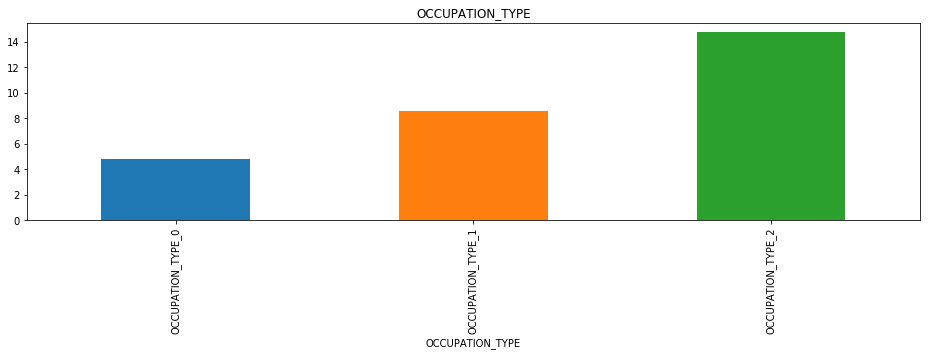

In [39]:
i = 0
plt.figure(figsize = (16, 8))
for col in ['OCCUPATION_TYPE']:
    i += 1
    plt.subplot(2, 1, i)
    _plot_per_categorical(col)

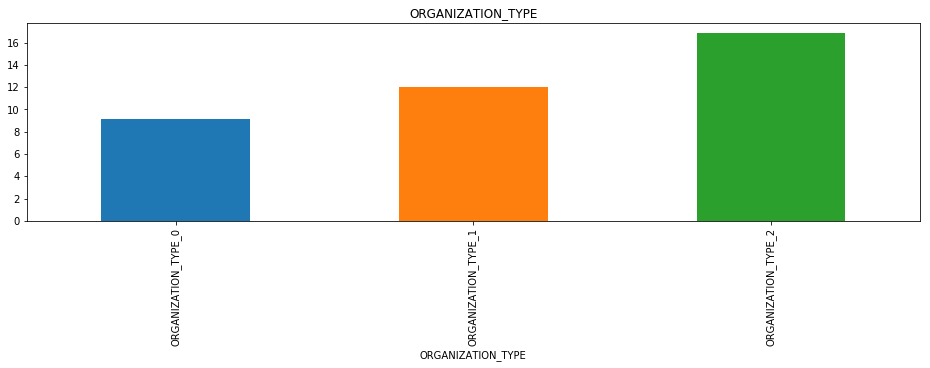

In [40]:
i = 0
plt.figure(figsize = (16, 8))
for col in ['ORGANIZATION_TYPE']:
    i += 1
    plt.subplot(2, 1, i)
    _plot_per_categorical(col)

### d) Anomalies detection
 mis-typed numbers, errors in measuring equipment, or could be valid but extreme measurements

In [41]:
# One way to check anomalies is describe function.
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [42]:
app_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

The numbers in the DAYS_BIRTH column are negative because they are recorded relative to the current loan application. To see these stats in years, we can mutliple by -1 and divide by the number of days in a year

In [43]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [44]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

That doesn't look right! The maximum value (besides being positive) is about 1000 years

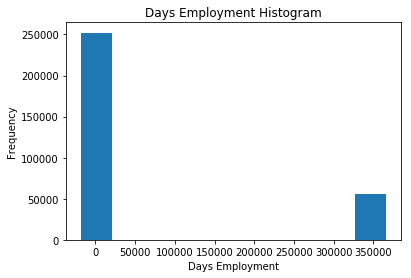

In [45]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

let's subset the anomalous clients and see if they tend to have higher or low rates of default than the rest of the clients.

In [46]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


anomalies seem to  have a lower rate of default.

As a **solution**, we will fill in the anomalous values with not a number (np.nan) and then create a new boolean column indicating whether or not the value was anomalous.

In [47]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

In [48]:
# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

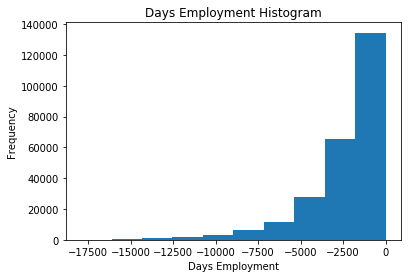

In [49]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [50]:
# Same approach to test set
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


### e) Checking numerical variables

In [51]:
#correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

In [52]:
print('Most Positive Correlations:\n', correlations.tail(15))

Most Positive Correlations:
 DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64


In [53]:
print('\nMost Negative Correlations:\n', correlations.head(15))


Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
LIVINGAREA_MEDI              -0.032739
Name: TARGET, dtype: float64


- look at some of more significant correlations: the DAYS_BIRTH is the most positive correlation. (except for TARGET because the correlation of a variable with itself is always 1!)<br> 

- Looking at the documentation, DAYS_BIRTH is the age in days of the client at the time of the loan in negative days (for whatever reason!). <br>
- The correlation is positive, but the value of this feature is actually negative, meaning that as the client gets older, they are less likely to default on their loan (ie the target == 0).<br> 

- That's a little confusing, so we will take the absolute value of the feature and then the correlation will be negative.

In [54]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982709

As clients get older, they tend to repay their loans on time more often.

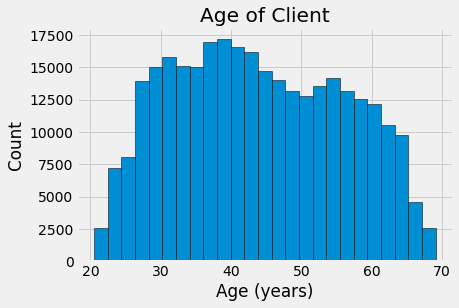

In [55]:
# Checking further on age

# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

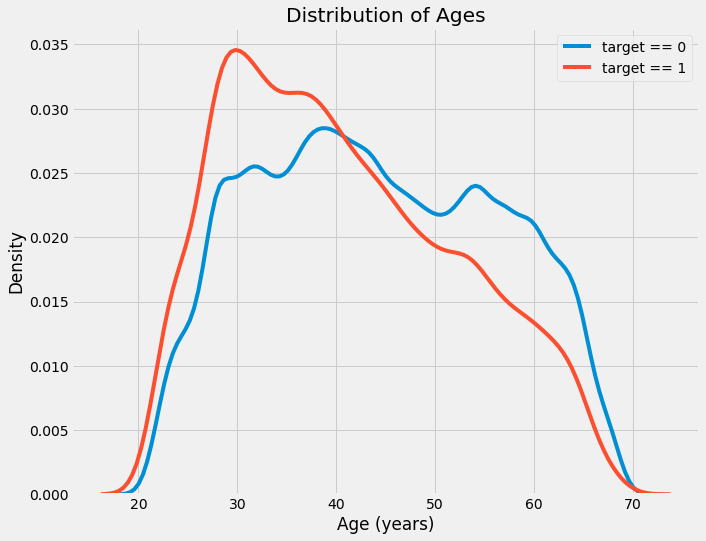

In [56]:
# kernel density estimate plot
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

The target == 1 curve skews towards the younger end of the range. Although this is not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in a machine learning model because it does affect the target. Let's look at this relationship in another way: average failure to repay loans by age bracket.

To make this graph, first we cut the age category into bins of 5 years each. Then, for each bin, we calculate the average value of the target, which tells us the ratio of loans that were not repaid in each age category.

### Binning

In [57]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

In [58]:
# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [59]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


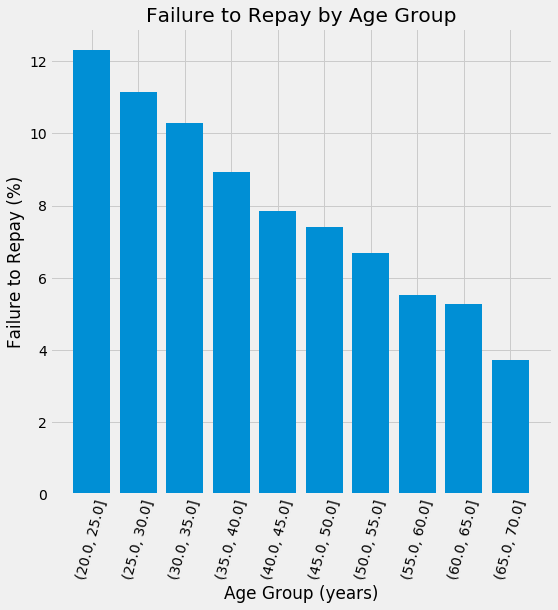

In [60]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

There is a clear trend: younger applicants are more likely to not repay the loan! The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.

This is information that could be directly used by the bank: because younger clients are less likely to repay the loan, maybe they should be provided with more guidance or financial planning tips. This does not mean the bank should discriminate against younger clients, but it would be smart to take precautionary measures to help younger clients pay on time.

### Exterior Sources

The 3 variables with the strongest negative correlations with the target are EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3. According to the documentation, these features represent a "normalized score from external data source". I'

Let's take a look at these variables.

First, we can show the correlations of the EXT_SOURCE features with the target and with each other.

In [61]:
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


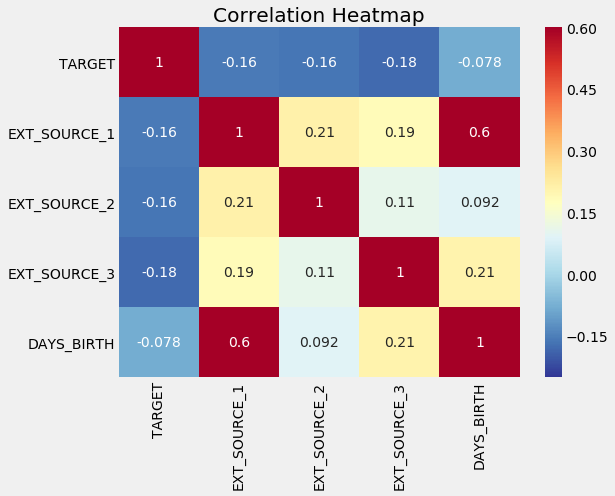

In [62]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

EXT_SOURCE features have negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan(0 being repay loan determinant)

 **distribution of each of these features colored by the value of the target**

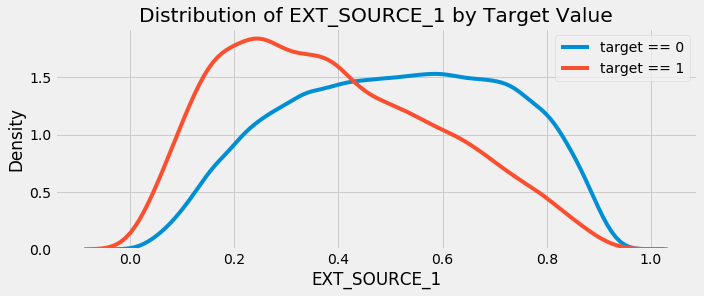

In [63]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of EXT_SOURCE_1 by Target Value')
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

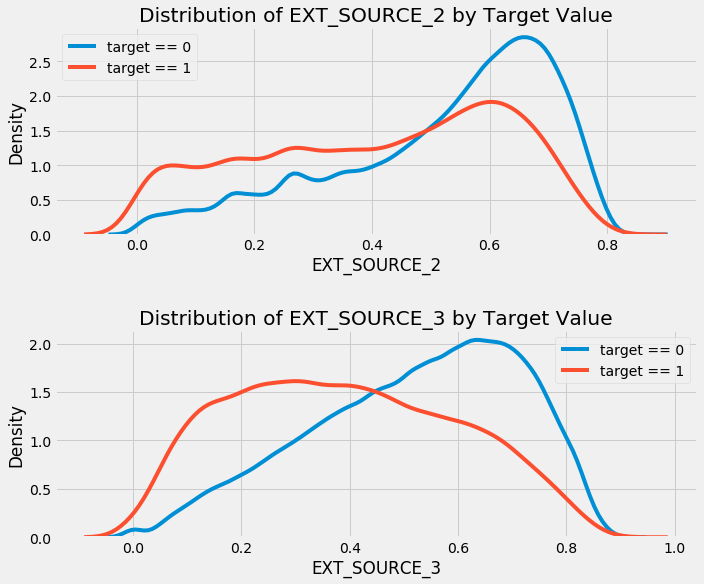

In [64]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_3 displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan. 

The relationship is not very strong (in fact they are all considered very weak, but these variables will still be useful for a machine learning model to predict whether or not an applicant will repay a loan on time.

# 2) Missing data

We already know our dependent variable has zero missing values as 282686+24825=307511. But we need to check other features

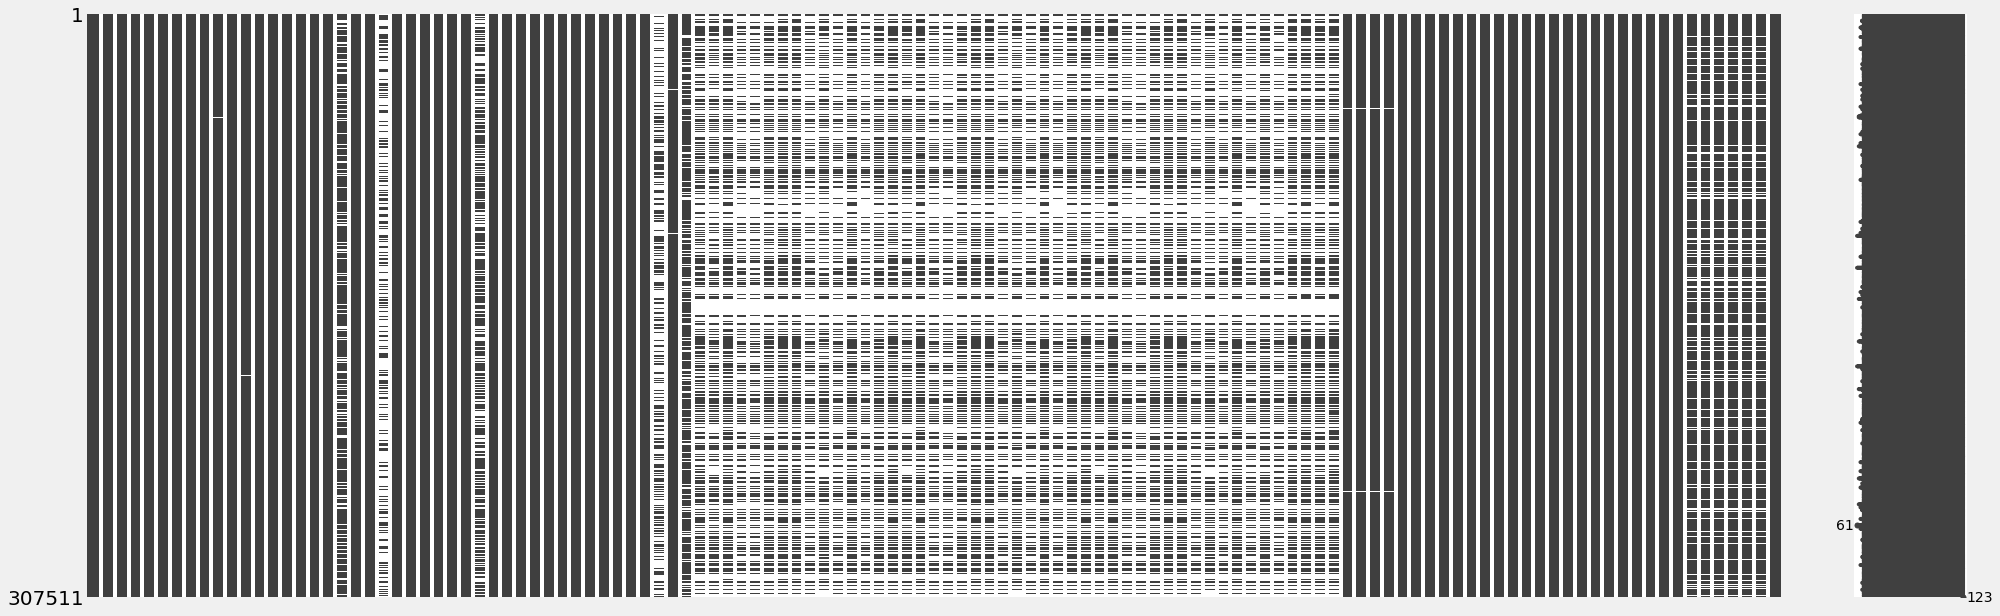

In [65]:
# Plot graphic of missing values
import missingno
missingno.matrix(app_train, figsize = (30,10))

**Visual matrix are mostly useful, but we cannot get much information. We certainly can see there are white dots signifying that there are missing points. But what are they?**

In [66]:
def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        #missing_vals.append(str(column)+ " column has {} missing or NaN values.".format())
    return missing_vals

In [67]:
missing_values = find_missing_values(app_train, columns=app_train.columns)
missing_values

Number of missing or NaN values for each column:


{'SK_ID_CURR': 0,
 'TARGET': 0,
 'NAME_CONTRACT_TYPE': 0,
 'CODE_GENDER': 0,
 'FLAG_OWN_CAR': 0,
 'FLAG_OWN_REALTY': 0,
 'CNT_CHILDREN': 0,
 'AMT_INCOME_TOTAL': 0,
 'AMT_CREDIT': 0,
 'AMT_ANNUITY': 12,
 'AMT_GOODS_PRICE': 278,
 'NAME_TYPE_SUITE': 1292,
 'NAME_INCOME_TYPE': 0,
 'NAME_EDUCATION_TYPE': 0,
 'NAME_FAMILY_STATUS': 0,
 'NAME_HOUSING_TYPE': 0,
 'REGION_POPULATION_RELATIVE': 0,
 'DAYS_BIRTH': 0,
 'DAYS_EMPLOYED': 55374,
 'DAYS_REGISTRATION': 0,
 'DAYS_ID_PUBLISH': 0,
 'OWN_CAR_AGE': 202929,
 'FLAG_MOBIL': 0,
 'FLAG_EMP_PHONE': 0,
 'FLAG_WORK_PHONE': 0,
 'FLAG_CONT_MOBILE': 0,
 'FLAG_PHONE': 0,
 'FLAG_EMAIL': 0,
 'OCCUPATION_TYPE': 106204,
 'CNT_FAM_MEMBERS': 2,
 'REGION_RATING_CLIENT': 0,
 'REGION_RATING_CLIENT_W_CITY': 0,
 'WEEKDAY_APPR_PROCESS_START': 0,
 'HOUR_APPR_PROCESS_START': 0,
 'REG_REGION_NOT_LIVE_REGION': 0,
 'REG_REGION_NOT_WORK_REGION': 0,
 'LIVE_REGION_NOT_WORK_REGION': 0,
 'REG_CITY_NOT_LIVE_CITY': 0,
 'REG_CITY_NOT_WORK_CITY': 0,
 'LIVE_CITY_NOT_WORK_CITY': 0,


In [68]:
# Another way is to perform simple isnull()
app_train.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                  55374
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [69]:
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

summary_missing(app_train)

No. of fields:  307511
No. of missing fields:  65


,No. of mising Value,%age of missing Value
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4


In [70]:
# Same on test-set
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

summary_missing(app_test)

No. of fields:  48744
No. of missing fields:  63


,No. of mising Value,%age of missing Value
COMMONAREA_MODE,33495,68.7
COMMONAREA_AVG,33495,68.7
COMMONAREA_MEDI,33495,68.7
NONLIVINGAPARTMENTS_MEDI,33347,68.4
NONLIVINGAPARTMENTS_MODE,33347,68.4
NONLIVINGAPARTMENTS_AVG,33347,68.4
FONDKAPREMONT_MODE,32797,67.3
LIVINGAPARTMENTS_MODE,32780,67.2
LIVINGAPARTMENTS_MEDI,32780,67.2
LIVINGAPARTMENTS_AVG,32780,67.2


**Clearly we have serious issue of missing values in both test and train dataset, we need to solve it. We will first show all possible issues in our dataset and then we will solve them one by one**

# 3) Dealing with Categorical variables

In [71]:
app_train.dtypes.value_counts()

float64    66
int64      40
object     16
bool        1
dtype: int64

int64 and float64 are numeric variables (which can be either discrete or continuous).<br>
object columns contain strings and are categorical features.

In [72]:
# Checking unique categorical variables
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE            2
CODE_GENDER                   3
FLAG_OWN_CAR                  2
FLAG_OWN_REALTY               2
NAME_TYPE_SUITE               7
NAME_INCOME_TYPE              8
NAME_EDUCATION_TYPE           5
NAME_FAMILY_STATUS            6
NAME_HOUSING_TYPE             6
OCCUPATION_TYPE               3
WEEKDAY_APPR_PROCESS_START    7
ORGANIZATION_TYPE             3
FONDKAPREMONT_MODE            4
HOUSETYPE_MODE                3
WALLSMATERIAL_MODE            7
EMERGENCYSTATE_MODE           2
dtype: int64

In [73]:
app_train['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [74]:
app_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [75]:
app_train['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

### Encoding Categorical Variables

In [76]:
le = LabelEncoder()
le_count = 0

In [77]:
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1

In [78]:
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [79]:
app_train = pd.get_dummies(app_train)

In [80]:
app_test = pd.get_dummies(app_test)

In [81]:
app_train.shape

(307511, 174)

In [82]:
app_test.shape

(48744, 170)

The number of variables has increased due to one-hot coding, but there is a difference between training and testing. Check the **variables in app_train not in app_test**

In [83]:
for fea_name in app_train.columns:
    if fea_name not in app_test.columns:
        print(fea_name)

TARGET
CODE_GENDER_XNA
NAME_INCOME_TYPE_Maternity leave
NAME_FAMILY_STATUS_Unknown


**Aligningment of Training and Testing** data is important.There need to be the same features (columns) in both the training and testing data.<br>

One-hot encoding has created more columns in the training data because there were some categorical variables with categories not represented in the testing data. To remove the columns in the training data that are not in the testing data, we need to align the dataframes. <br>

In [84]:
#First we extract the target column from the training data 
#(because this is not in the testing data but we need to keep this information)
train_labels = app_train['TARGET']

In [85]:
train_labels.shape

(307511,)

In [86]:
#When we do the align, we must make sure to set axis = 1 to align the dataframes based on the columns and not on the rows.
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

In [87]:
app_train.shape

(307511, 170)

In [88]:
app_test.shape

(48744, 170)

In [89]:
# again adding TARGET in app_train dataframe
app_train['TARGET'] = train_labels

In [90]:
print('Training set: ', app_train.shape)
print('Testing set: ', app_test.shape)

Training set:  (307511, 171)
Testing set:  (48744, 170)


# 3- Treating Outliers
In a data set there are often unusual observations. The cause may come from misidentified data, wrong data entry, special-observation observations, etc. The investigation of abnormal data can help discover some of data and at the same time correct the data in case of incorrect input. Checking abnormal data can be done by descriptive statistics.

In [91]:
app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,0,1,0,1,0,1
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,1,0,0,0,0,0,0,1,0,0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,0


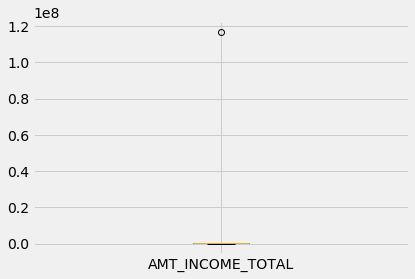

In [92]:
app_train['AMT_INCOME_TOTAL'].describe().plot.box()

We find that income variable shows abnormal data when most quintiles of variables are low in origin 0 except for some special high cases. This shows that there is a difference in the income of borrowers.

In [93]:
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

The highest value of income is about 117 million USD while the average income is only 168 thousand USD. We will check the distribution of the TARGET variable according to the AMT_INCOME_TOTAL variable for the cases of Repaid and No repaid.

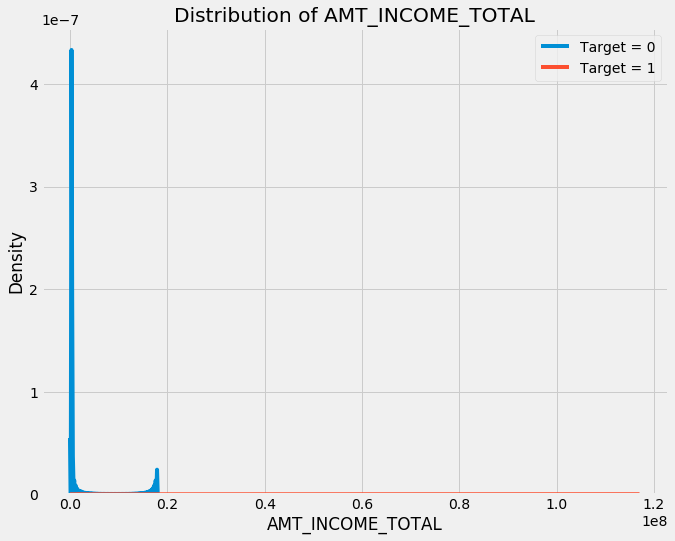

In [94]:
def _plot_density(colname):
    plt.figure(figsize = (10, 8))
    sns.kdeplot(app_train[colname][app_train['TARGET'] == 0], label = 'Target = 0')
    sns.kdeplot(app_train[colname][app_train['TARGET'] == 1], label = 'Target = 1')
    plt.xlabel(colname)
    plt.ylabel('Density')
    plt.title('Distribution of %s'%colname)

_plot_density('AMT_INCOME_TOTAL')

We need to regulate outliers in the range of permissible variations and reduces the deviation effect caused by them.

### 3 sigma method
This method is used to adjust the values outside the domain [[− 3σ, μ + 3σ] in that value domain. For values greater than μ + 3σ will be assigned with μ + 3σ and similar with a value less than μ − 3σ

In [95]:
def _zoom_3sigma(col, dataset, dataset_apl):
    '''
    col: Data column name
    dataset: The original data table is used to calculate about 3 sigma
    dataset_apl: New data table applies about 3 sigma taken from the dataset..
    '''
    xs = dataset[col]
    mu = xs.mean()
    sigma = xs.std()
    low =  mu - 3*sigma
#     low =  0 if low < 0 else low
    high = mu + 3*sigma
    
    def _value(x):
        if x < low: return low
        elif x > high: return high
        else: return x
    xapl = dataset_apl[col]    
    xnew = list(map(lambda x: _value(x), xapl))
    n_low = len([i for i in xnew if i == low])
    n_high = len([i for i in xnew if i == high])
    n = len(xapl)
    print('Percentage of low: {:.2f}{}'.format(100*n_low/n, '%'))
    print('Percentage of high: {:.2f}{}'.format(100*n_high/n, '%'))
    print('Low value: {:.2f}'.format(low))
    print('High value: {:.2f}'.format(high))
    return xnew

# Check with FLAG_MOBIL variable
x = _zoom_3sigma('FLAG_MOBIL', app_train, app_train)

Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: 0.99
High value: 1.01


In [96]:
app_train.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('bool'), dtype('uint8')],
      dtype=object)

In [97]:
# Statistics of different values in all variables
def _count_unique(x):
    return pd.Series.nunique(x)

tbl_dis_val = app_train.apply(_count_unique).sort_values(ascending = False)
tbl_dis_val[tbl_dis_val > 500]

SK_ID_CURR                307511
EXT_SOURCE_2              119831
EXT_SOURCE_1              114584
DAYS_BIRTH                 17460
DAYS_REGISTRATION          15688
AMT_ANNUITY                13672
DAYS_EMPLOYED              12573
DAYS_ID_PUBLISH             6168
AMT_CREDIT                  5603
LIVINGAREA_MODE             5301
LIVINGAREA_MEDI             5281
LIVINGAREA_AVG              5199
TOTALAREA_MODE              5116
BASEMENTAREA_MODE           3841
BASEMENTAREA_AVG            3780
DAYS_LAST_PHONE_CHANGE      3773
BASEMENTAREA_MEDI           3772
LANDAREA_MODE               3563
LANDAREA_MEDI               3560
LANDAREA_AVG                3527
NONLIVINGAREA_MODE          3327
NONLIVINGAREA_MEDI          3323
NONLIVINGAREA_AVG           3290
COMMONAREA_MEDI             3202
COMMONAREA_AVG              3181
COMMONAREA_MODE             3128
AMT_INCOME_TOTAL            2548
APARTMENTS_AVG              2339
LIVINGAPARTMENTS_AVG        1868
APARTMENTS_MEDI             1148
LIVINGAPAR

We consider variables with a different number of values> 500 as continuous variables. Apply the 3 sigma principle to these variables

In [98]:
cols_3sigma = tbl_dis_val[tbl_dis_val > 500].index.tolist()

In [99]:
# Remove the key variable SK_ID_CURR from the list
cols_3sigma = cols_3sigma[1:]

In [100]:
# Remove outlier by 3 sigma
for col in cols_3sigma:
    print(col)
    app_train[col] = _zoom_3sigma(col, app_train, app_train) 
    print('------------------------\n')

EXT_SOURCE_2
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -0.06
High value: 1.09
------------------------

EXT_SOURCE_1
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -0.13
High value: 1.14
------------------------

DAYS_BIRTH
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: 2945.03
High value: 29128.96
------------------------

DAYS_REGISTRATION
Percentage of low: 0.24%
Percentage of high: 0.00%
Low value: -15554.78
High value: 5582.54
------------------------

AMT_ANNUITY
Percentage of low: 0.00%
Percentage of high: 0.96%
Low value: -16372.64
High value: 70589.79
------------------------

DAYS_EMPLOYED
Percentage of low: 1.84%
Percentage of high: 0.00%
Low value: -9399.25
High value: 4630.91
------------------------

DAYS_ID_PUBLISH
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -7522.55
High value: 1534.15
------------------------

AMT_CREDIT
Percentage of low: 0.00%
Percentage of high: 1.06%
Low value: -608446.33
High valu

In [101]:
# Same for test set
for col in cols_3sigma:
    print(col)
    app_test[col] = _zoom_3sigma(col, app_test, app_test) 
    print('------------------------\n')

EXT_SOURCE_2
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -0.03
High value: 1.06
------------------------

EXT_SOURCE_1
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -0.11
High value: 1.12
------------------------

DAYS_BIRTH
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -29045.79
High value: -3090.38
------------------------

DAYS_REGISTRATION
Percentage of low: 0.25%
Percentage of high: 0.00%
Low value: -15625.49
High value: 5690.18
------------------------

AMT_ANNUITY
Percentage of low: 0.00%
Percentage of high: 1.04%
Low value: -18622.86
High value: 77475.35
------------------------

DAYS_EMPLOYED
Percentage of low: 1.73%
Percentage of high: 0.00%
Low value: -9400.63
High value: 4447.15
------------------------

DAYS_ID_PUBLISH
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -7759.54
High value: 1656.12
------------------------

AMT_CREDIT
Percentage of low: 0.00%
Percentage of high: 2.32%
Low value: -579450.58
High va

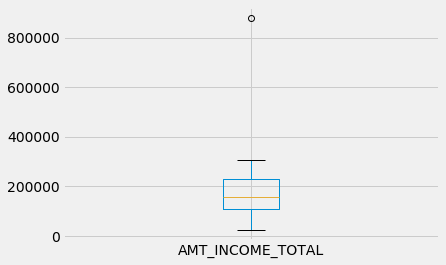

In [102]:
# Re-check AMT_INCOME_TOTAL variable after removing outlier
app_train['AMT_INCOME_TOTAL'].describe().plot.box()

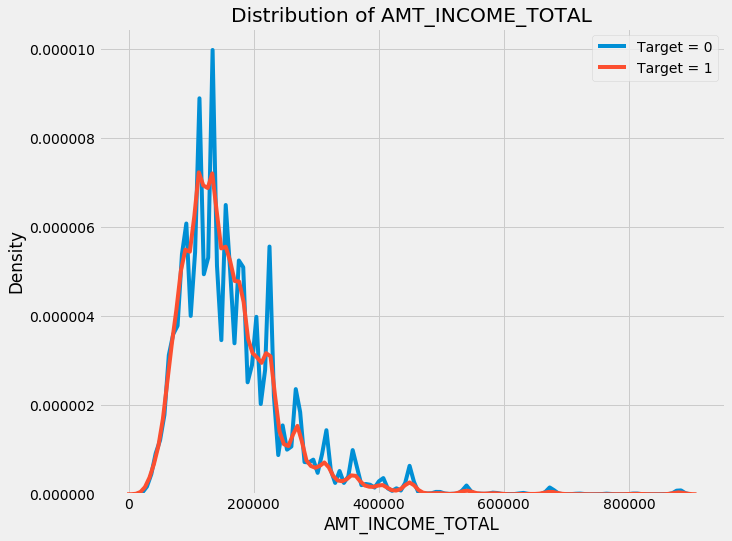

In [103]:
_plot_density('AMT_INCOME_TOTAL')

Thus, after removing oulier, the distribution graph of AMT_INCOME_TOTAL is no longer biased. The landmarks Q1, Q2, Q3, Q4 in quintiles have not been too small compared to the largest values in the original box plot chart. The density function diagram also shows that a distribution does not have the difference values as before adjustment.

In [104]:
app_train.shape

(307511, 171)

In [105]:
app_test.shape

(48744, 170)

# 4- Missing Values
 We will apply MinMaxScaler to standardize the predictor variable and use the mean to handle missing data.

In [106]:
from sklearn.preprocessing import Imputer

if 'TARGET' in app_train.columns:
    TARGET = app_train.pop('TARGET') # Acts as dependant variable i.e y
    
# Assign train and test to app_train and app_test; train and test are used to scale data

train = app_train
test = app_test

# Initialize in compute method according to the average method

inputer = Imputer(strategy = 'mean')
inputer.fit(train)

# Enter NA values as average
train = inputer.transform(train)
test = inputer.transform(test)

In [107]:
train.shape

(307511, 170)

In [108]:
test.shape

(48744, 170)

# 5) Normalize/Scale data

In [109]:
# Initialize the scaler with the MinMaxScaler method in the range [-1, 1]
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (-1, 1))
scaler.fit(train)

# Scale data on train and test
train = scaler.transform(train)
test = scaler.transform(test)

In [110]:
# Remove the first column SK_ID_CURR because this column is a key. When needed to get from app_train and app_test
train = train[:, 1:]
test = test[:, 1:]

In [111]:
print('train shape: ', train.shape)
print('test shape: ', test.shape)

train shape:  (307511, 169)
test shape:  (48744, 169)


# 6-Time to Regress

Finding out the Repaid / Not Repaid ratio distribution of numeric variables, logistic model seems to be obvious choice

## a-Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 0.0001)
log_reg.fit(train, TARGET)

In [ ]:
train_pred_prob = log_reg.predict_proba(train)[:, 1]

In [ ]:
TARGET.value_counts()/TARGET.value_counts().sum()

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve, precision_recall_curve
fpr, tpr, thres = precision_recall_curve(TARGET, train_pred_prob)

def _plot_roc_curve(fpr, tpr, thres):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', label = 'ROC')
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

_plot_roc_curve(fpr, tpr, thres)

Precision and Recall are other two alternatives.Both measure the level of accurate forecasting.<br>
Precision evaluates the exact forecast rate of bad records in the total number of cases that are forecasted to be bad.
Recall evaluates the exact bad profile forecast rate when the profile is essentially bad.
Besides, there are other indicators we can consider like F1-Score, Kappa, Gini.

In [ ]:
from sklearn.metrics import precision_recall_curve
prec, rec, thres = precision_recall_curve(TARGET, train_pred_prob)

def _plot_prec_rec_curve(prec, rec, thres):
    plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    plt.legend()

_plot_prec_rec_curve(prec, rec, thres)

The non-protruding ROC curve above the horizontal axis indicates the classification power of the relatively weak model. The ratio of precision and recall to threshold thresholds is also not convex curves that lead to a change in threshold that can increase the trade-off between significant precision and recall rates. At each level threshold does not achieve simultaneous high precision and recall rates. Instead, you'll have to trade between high precision or high recall. This is not a good enough model to apply in practice

### Using Feature engineering
In sklearn we can easily use PolynormialFeatures ()

In [ ]:
print(cols_corr_15)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, Imputer, MinMaxScaler

# Initialize preprocessing. Inputer according to mean, minmax scaler in range 0, 1 and polynomial features level 3
inputer = Imputer(strategy = 'mean')
minmax_scaler = MinMaxScaler(feature_range = (0, 1))
poly_engineer = PolynomialFeatures(degree = 3)

In [ ]:
# Get the features that are most correlated to the target variable from app_train and app_test
TARGET = app_train[cols_corr_15[-1]]
train_poly_fea = app_train[cols_corr_15[:-1]]
test_poly_fea = app_test[cols_corr_15[:-1]]

In [ ]:
# input missing data
inputer = inputer.fit(train_poly_fea)
train_poly_fea = inputer.transform(train_poly_fea)
test_poly_fea = inputer.transform(test_poly_fea)

In [ ]:
# Minmax data scaler
minmax_scaler = minmax_scaler.fit(train_poly_fea)
train_poly_fea = minmax_scaler.transform(train_poly_fea)
test_poly_fea = minmax_scaler.transform(test_poly_fea)

In [ ]:
print('train_poly_fea shape: ', train_poly_fea.shape)
print('test_poly_fea shape: ', test_poly_fea.shape)

In [ ]:
# Polynomial features data
poly_engineer = poly_engineer.fit(train_poly_fea)
train_poly_fea = poly_engineer.transform(train_poly_fea)
test_poly_fea = poly_engineer.transform(test_poly_fea)

In [ ]:
print('train_poly_fea shape: ', train_poly_fea.shape)
print('test_poly_fea shape: ', test_poly_fea.shape)

After the feature engineering, the number of variables has increased from 15 to 816 variables

In [ ]:
features = poly_engineer.get_feature_names(input_features = cols_corr_15[:-1])
features[:10]

To assess whether after implementing features engineering helps improve results, we do logistic regression according to new features.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Build logistic regression model with control parameter C = 0.0001
lg_reg = LogisticRegression(C = 0.0001)
lg_reg.fit(train_poly_fea, TARGET)
lg_reg

In [ ]:
# Logistic probability prediction
train_pred_prob = lg_reg.predict_proba(train_poly_fea)[:, 1]

In [ ]:
# Representing roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(TARGET, train_pred_prob)


def _plot_roc_curve(fpr, tpr, thres):
    roc = plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', label = 'ROC')
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    return roc
p1 = _plot_roc_curve(fpr, tpr, thres)

In [ ]:
from sklearn.metrics import auc
auc(fpr, tpr)

In [ ]:
from sklearn.metrics import precision_recall_curve, accuracy_score

prec, rec, thres = precision_recall_curve(TARGET, train_pred_prob)

def _plot_prec_rec_curve(prec, rec, thres):
    plot_pr = plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    return plot_pr

_plot_prec_rec_curve(prec, rec, thres)

In [ ]:
# Accuracy
train_pred_label = lg_reg.predict(train_poly_fea)
accuracy_score(TARGET, train_pred_label)

## b-Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#create forest trees
rd_classifier = RandomForestClassifier(n_estimators = 100, 
                                       max_depth = 5, 
                                       random_state = 123, 
                                       verbose = 1,
                                       n_jobs = -1)

In [ ]:
rd_classifier

In [ ]:
# fitting model
rd_classifier.fit (train_poly_fea, TARGET)

In [ ]:
# Forecast on train practice
train_prob_rd = rd_classifier.predict_proba (train_poly_fea) [:, 1]

In [ ]:
fpr2, tpr2, thres2 = roc_curve(TARGET, train_prob_rd)
p2 = _plot_roc_curve(fpr, tpr, thres)

### Logistic vs Random Forest

In [ ]:
plt.figure(figsize = (10, 8))
plt.plot(fpr2, tpr2, 'b-', label = 'Random Forest')
plt.plot(fpr, tpr, 'r-', label = 'Logistic')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

**We find that Random Forest's ROC is more convex than Logistic. This shows that Random Forest's classification power is better than Logistic.**

In [ ]:
from sklearn.metrics import auc
auc(fpr2, tpr2)

### Precision diagrams and recall curve

In [ ]:
prec, rec, thres = precision_recall_curve(TARGET, train_pred_prob)
_plot_prec_rec_curve(prec, rec, thres)

In [ ]:
#importance of variables affecting the target variable
feature_importance = rd_classifier.feature_importances_
feature_importance = pd.DataFrame ({'importance values': feature_importance})
feature_importance.index = features
feature_importance = feature_importance.sort_values ('importance values', ascending = False)
feature_importance [: 10]

In [ ]:
feature_importance[:10].sort_values('importance values', ascending = True).plot.barh(figsize = (8, 6))
plt.yticks(rotation = 15)
plt.xlabel('Importance values')

In [ ]:
feature_importance.iloc[:5, 0].tolist()

### Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
train_label_rd = rd_classifier.predict(train_poly_fea)
accuracy_score(train_label_rd, TARGET)

In [ ]:
np.unique(train_label_rd, return_counts = True)

## c-Gradient Boosting

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

In [ ]:
lgb_classifier = lgb.LGBMClassifier(n_estimator = 10000, 
                                    objective = 'binary', 
                                    class_weight = 'balanced',
                                    learning_rate = 0.05,
                                    reg_alpha = 0.1,
                                    reg_lambda = 0.1,
                                    subsample = 0.8,
                                    n_job = -1,
                                    random_state = 12
                                   )
lgb_classifier

In [ ]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = 12)
valid_scores = []
train_scores = []
count = 0
for train_idx, valid_idx in kfold.split(train_poly_fea):
    count += 1
    # Split train, valid
    train_features, train_labels = train_poly_fea[train_idx], TARGET[train_idx]
    valid_features, valid_labels = train_poly_fea[valid_idx], TARGET[valid_idx]
    lgb_classifier.fit(train_features, train_labels, eval_metric = 'auc',
              eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
              eval_names = ['valid', 'train'], 
              early_stopping_rounds = 100, verbose = 200)
    
    valid_score = lgb_classifier.best_score_['valid']['auc'] 
    train_score = lgb_classifier.best_score_['train']['auc'] 
    
    valid_scores.append(valid_score)
    train_scores.append(train_score)
    
    print('fold time: {}; train score: {}; valid score: {}'.format(count, valid_score, train_score))

## d-Neural network

In [ ]:
from keras.layers import Input, Dense, Flatten, Concatenate, concatenate, Dropout, Lambda
from keras.models import Model
from keras.layers.embeddings import Embedding

In [ ]:
train.shape

In [ ]:
# design neural network
input_els = []
encode_els = []

# Generate a list include many Input layers

for i in range(train.shape[1]):
    # input alway have the shape (*, 1)
    input_els.append(Input(shape = (1,)))
    encode_els.append(input_els[-1])
# encode_els

In [ ]:
# concatenate all layers
encode_els = concatenate(encode_els) 

# After completed the input layers, we design the hidden layers
hidden1 = Dense(units = 128, kernel_initializer = 'normal', activation = 'relu')(encode_els)
droplayer1 = Dropout(0.2)(hidden1)
hidden2 = Dense(64, kernel_initializer = 'normal', activation = 'relu')(droplayer1)
droplayer2 = Dropout(0.2)(hidden2)
outputlayer = Dense(1, kernel_initializer = 'normal', activation = 'sigmoid')(droplayer2)

classifier = Model(input = input_els, outputs = [outputlayer])

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

In [ ]:
from sklearn.model_selection import KFold
count = 0
kfold = KFold(n_splits = 10, shuffle = True, random_state = 12)
valid_scores = []
train_scores = []
for train_idx, valid_idx in kfold.split(train_poly_fea):
    while count < 1:
        count += 1
        # Split train, valid
        train_features, train_labels = train[train_idx], TARGET[train_idx]
        valid_features, valid_labels = train[valid_idx], TARGET[valid_idx]
        classifier.fit(
            [train_features[:, i] for i in range(train.shape[1])], #lấy list toàn bộ các cột
            train_labels,
            epochs=1,
            batch_size=128,
            shuffle=True,
            validation_data=([valid_features[:, i] for i in range(train.shape[1])], valid_labels) 
        )

In [ ]:
#FORECAST ON TRAINING data

In [ ]:
train_prob_nn = classifier.predict([train[:, i] for i in range(train.shape[1])])
train_prob_nn

In [ ]:
fpr4, tpr4, thres4 = roc_curve(TARGET, train_prob_nn)
_plot_roc_curve(fpr4, tpr4, thres4)

In [ ]:
from sklearn.metrics import auc
auc(fpr4, tpr4)

In [ ]:
prec, rec, thres = precision_recall_curve(TARGET, train_prob_nn)
_plot_prec_rec_curve(prec, rec, thres)